<a href="https://colab.research.google.com/github/vaseline555/Course__Blockchain-based-Electronic-Lab-Notebook/blob/master/exercise/MGE511_03_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Apr  1 06:33:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import torch
import torch.nn as nn
import torch.optim as opt

print(torch.__version__)

1.4.0


In [0]:
import sys
sys.path.insert(0, '..')

In [0]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

mnist_transform = transforms.Compose([transforms.ToTensor()])

mnist_train = MNIST(root='./', train=True, download=True, transform=mnist_transform)
mnist_test = MNIST(root='./', train=False, download=True, transform=mnist_transform)

In [0]:
from torch.utils.data import DataLoader

BATCH_SIZE = 6
train_loader = DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

torch.Size([6, 1, 28, 28])
torch.Size([6])


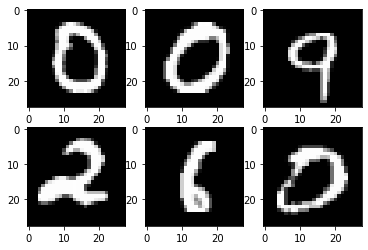

In [6]:
import matplotlib.pyplot as plt

for X, y in train_loader:
  print(X.shape)
  print(y.shape)

  fig = plt.figure()
  for i in range(BATCH_SIZE):
    plt.subplot(2, BATCH_SIZE // 2, i + 1)
    plt.imshow(X[i].reshape(X[i].shape[1], -1), cmap='gray')
  break

In [0]:
class MultiLayerPerceptron(nn.Module):
  def __init__(self):
    super(MultiLayerPerceptron, self).__init__()
    self.layer0 = nn.Linear(28 * 28, 64, bias=True)
    self.layer1 = nn.Linear(64, 32, bias=False)
    self.layer2 = nn.Linear(32, 10, bias=False)

  def forward(self, inputs):
    inputs = inputs.view(-1, 28 * 28)
    hidden1 = self.layer0(inputs)
    hidden2 = self.layer1(nn.ReLU()(hidden1))
    outputs = self.layer2(nn.ReLU()(hidden2))

    return outputs

In [0]:
model = MultiLayerPerceptron().cuda()

In [9]:
[print(p.shape) for p in model.parameters()]

torch.Size([64, 784])
torch.Size([64])
torch.Size([32, 64])
torch.Size([10, 32])


[None, None, None, None]

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = opt.SGD(model.parameters(), lr=0.005)

In [0]:
BATCH_SIZE = 128
NUM_EPOCHS = 200

loss_graph = {'train': [], 'test': [], 'epoch': []}

train_loader = DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=True)

In [12]:
for epoch in range(NUM_EPOCHS):
  for X_train, y_train in train_loader:
    y_pred_train = model(X_train.cuda())
    loss = criterion(y_pred_train, y_train.cuda())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if epoch % 10 == 0:
    loss = criterion(y_pred_train, y_train.cuda())
    loss_graph['train'].append(loss)

    count = 0

    for X_test, y_test in test_loader:
      with torch.autograd.no_grad():
        y_pred_test = model(X_test.cuda())
        correct = torch.sum(torch.argmax(y_pred_test, 1) == y_test.cuda())
        count += correct.cpu().detach().numpy()
    
    loss_test = criterion(y_pred_test, y_test.cuda())
    loss_graph['test'].append(loss_test)
    loss_graph['epoch'].append(epoch)

    print(f'\n[INFO] Test accuracy: {100 * count / 10000:.1f} %')
    print(f'[INFO] Epoch: {epoch + 1}, Train Loss: {loss}, Test Loss: {loss_test}')


[INFO] Test accuracy: 41.1 %
[INFO] Epoch: 1, Train Loss: 2.2417476177215576, Test Loss: 2.1924479007720947

[INFO] Test accuracy: 88.9 %
[INFO] Epoch: 11, Train Loss: 0.46213456988334656, Test Loss: 0.4386400580406189

[INFO] Test accuracy: 91.3 %
[INFO] Epoch: 21, Train Loss: 0.18550603091716766, Test Loss: 0.3018083870410919

[INFO] Test accuracy: 92.6 %
[INFO] Epoch: 31, Train Loss: 0.41065895557403564, Test Loss: 0.03919985890388489

[INFO] Test accuracy: 93.4 %
[INFO] Epoch: 41, Train Loss: 0.25233331322669983, Test Loss: 0.0341830849647522

[INFO] Test accuracy: 94.2 %
[INFO] Epoch: 51, Train Loss: 0.21822841465473175, Test Loss: 0.07490229606628418

[INFO] Test accuracy: 94.7 %
[INFO] Epoch: 61, Train Loss: 0.1017194613814354, Test Loss: 0.04471242427825928

[INFO] Test accuracy: 95.1 %
[INFO] Epoch: 71, Train Loss: 0.173405721783638, Test Loss: 0.19710904359817505

[INFO] Test accuracy: 95.5 %
[INFO] Epoch: 81, Train Loss: 0.25588735938072205, Test Loss: 0.9154233932495117

[

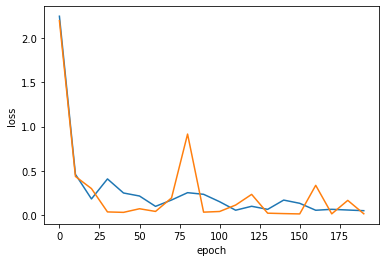

In [13]:
plt.plot(loss_graph['epoch'], loss_graph['train'])
plt.plot(loss_graph['epoch'], loss_graph['test'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()